In [1]:
import numpy as np
from qutip import *

import matplotlib.pyplot as plt

In [2]:
rho = 0.5 * fock_dm(2, 0) + 0.5 * fock_dm(2, 1)
entropy_linear(rho)

0.5

In [3]:
entropy_vn(rho)

0.6931471805599453

In [4]:
H = 2 * np.pi * 0.1 * sigmax()

psi0 = basis(2, 0)

times = np.linspace(0.0, 10.0, 100.0)

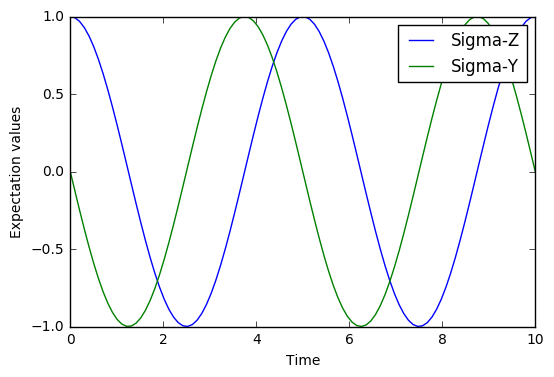

In [5]:
result = mesolve(H, psi0, times, [], [sigmaz(), sigmay()])

fig, ax = plt.subplots();
ax.plot(result.times, result.expect[0]);
ax.plot(result.times, result.expect[1]);
ax.set_xlabel('Time');
ax.set_ylabel('Expectation values');
ax.legend(("Sigma-Z", "Sigma-Y"));
plt.show()

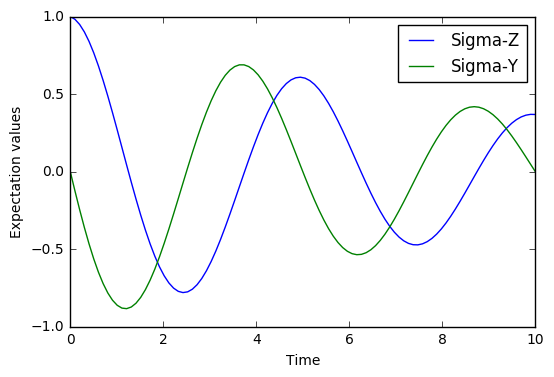

In [6]:
result = mesolve(H, psi0, times, [np.sqrt(0.05) * sigmax()], [sigmaz(), sigmay()])

fig, ax = plt.subplots();
ax.plot(result.times, result.expect[0]);
ax.plot(result.times, result.expect[1]);
ax.set_xlabel('Time');
ax.set_ylabel('Expectation values');
ax.legend(("Sigma-Z", "Sigma-Y"));
plt.show()

In [7]:
times = np.linspace(0.0, 250, 250)
# psi0 = tensor(fock(2,0), fock(20, 0))
psi0 = tensor(fock(2,0), coherent(20, 0.5)) # start a small coherent sate + ground state
a = tensor(qeye(2), destroy(20))
sz = tensor(sigmaz(), qeye(20))
sm = tensor(destroy(2), qeye(20))
sp = tensor(create(2), qeye(20))

H = 2 * np.pi * a.dag() * a + 1 * np.pi * sz + \
2 * np.pi * 0.1 * (sm * a.dag() + sm.dag() * a)

In [8]:
result = mesolve(H, psi0, times, 
                 [np.sqrt(2*0.005)*a, np.sqrt(0.01)*sm, np.sqrt(0.05)*sp], 
                 [a.dag()*a, sm.dag()*sm])

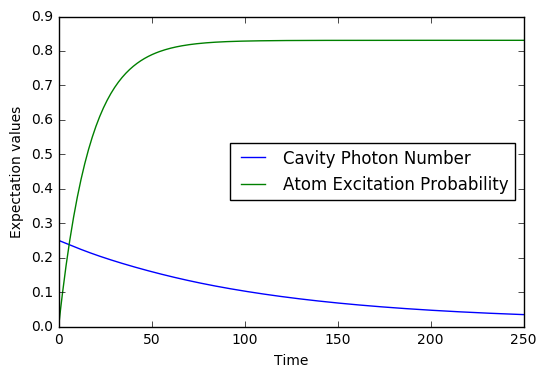

In [9]:
fig, ax = plt.subplots();
ax.plot(result.times, result.expect[0]);
ax.plot(result.times, result.expect[1]);
ax.set_xlabel('Time');
ax.set_ylabel('Expectation values');
ax.legend(("Cavity Photon Number", 
           "Atom Excitation Probability"), 
          loc=5);
plt.show()

In [10]:
data = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])

10.0%. Run time:  10.89s. Est. time left: 00:00:01:38
20.0%. Run time:  12.67s. Est. time left: 00:00:00:50
30.0%. Run time:  14.41s. Est. time left: 00:00:00:33
40.0%. Run time:  16.11s. Est. time left: 00:00:00:24
50.0%. Run time:  17.87s. Est. time left: 00:00:00:17
60.0%. Run time:  19.62s. Est. time left: 00:00:00:13
70.0%. Run time:  21.60s. Est. time left: 00:00:00:09
80.0%. Run time:  23.45s. Est. time left: 00:00:00:05
90.0%. Run time:  25.18s. Est. time left: 00:00:00:02
100.0%. Run time:  26.92s. Est. time left: 00:00:00:00
Total run time:  26.97s


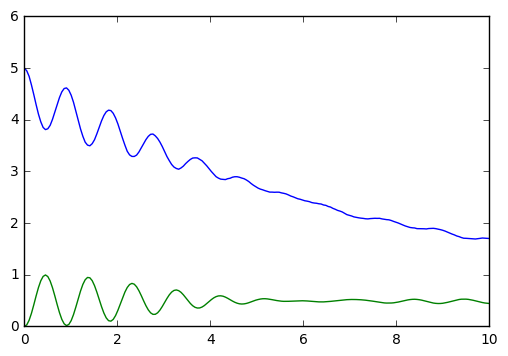

In [36]:
plt.figure();
plt.plot(times, data.expect[0], times, data.expect[1]);
plt.show()

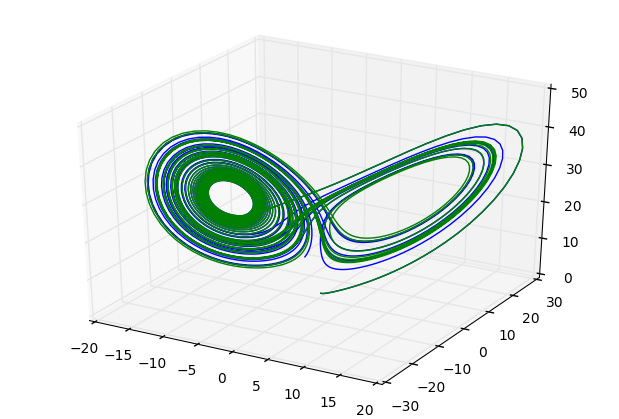

In [3]:
from scipy.integrate import odeint
import numpy as np

def lorenz(w, t, p, r, b):
    # 给出位置矢量w，和三个参数p, r, b计算出
    # dx/dt, dy/dt, dz/dt的值
    x, y, z = w.tolist()
    # 直接与lorenz的计算公式对应
    return p*(y-x), x*(r-z)-y, x*y-b*z

t = np.arange(0, 30, 0.01) # 创建时间点
# 调用ode对lorenz进行求解, 用两个不同的初始值
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0))

# 绘图
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0], track1[:,1], track1[:,2], lw=1)
ax.plot(track2[:,0], track2[:,1], track2[:,2], lw=1)
plt.show()